In [84]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [85]:
#Veriyi çekip ilk 5 elementi gösterme
def load_data():
    data_root = "https://github.com/ageron/data/raw/main/"
    data = pd.read_csv(data_root + "housing/housing.csv")
    return data
housing_prices = load_data()
housing_prices.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [86]:
housing_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [87]:
housing_prices["ocean_proximity"].value_counts()#okyanusa yakınlık kategorisindeki evlerin dağılımı

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [88]:
housing_prices.describe()#değerlendirilen verilerin istatastiki bir takım değerleri

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


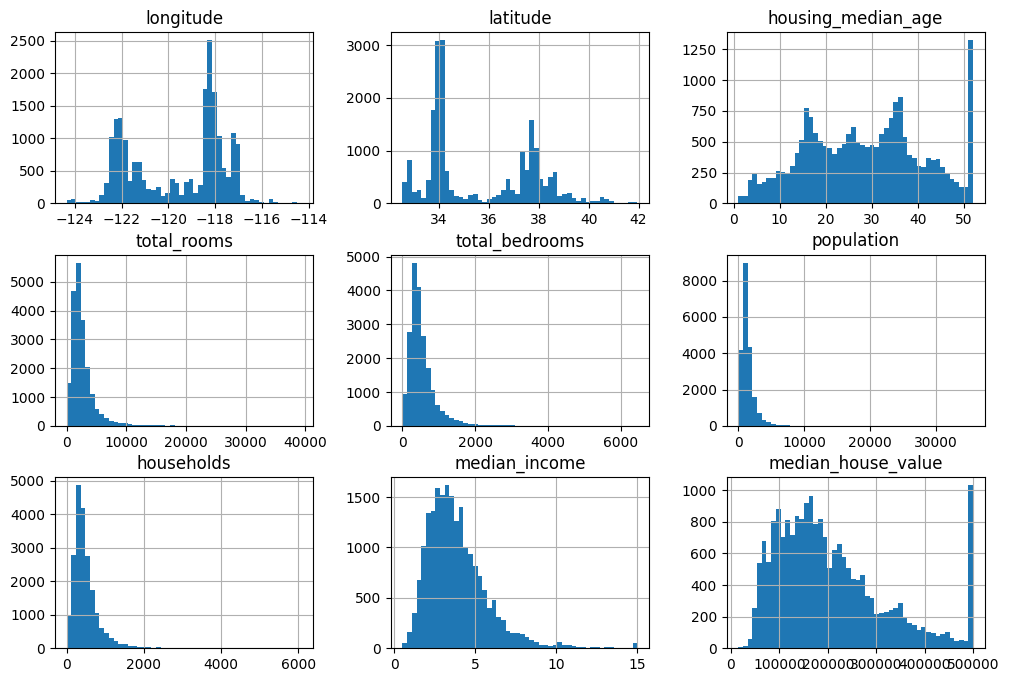

In [89]:
housing_prices.hist(bins=50, figsize=(12, 8))#verileri görselleştirme
plt.show()

In [90]:
def shuffle_and_split_data(data, test_ratio): #datanın belirtilen yüzdelik bir kısmını test için ayıran bir fonksiyon
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]
train_set, test_set = shuffle_and_split_data(housing_prices, 0.2)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

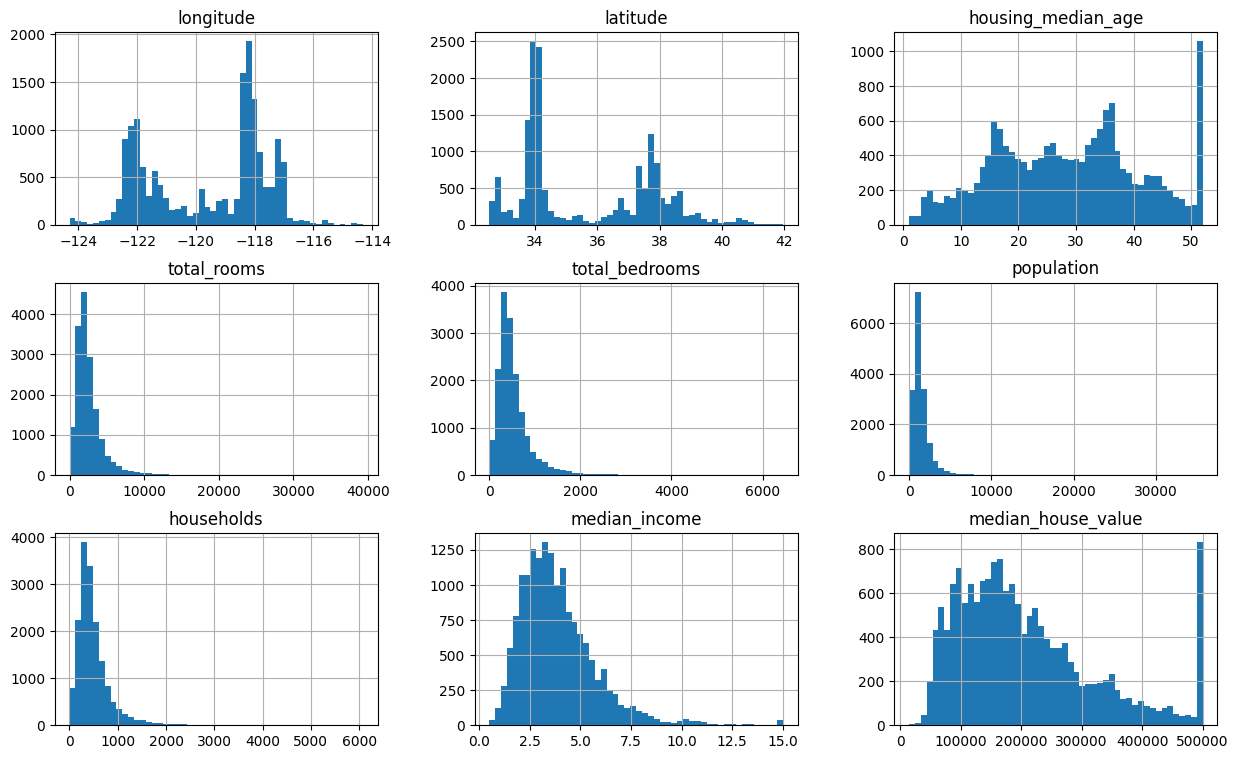

In [91]:
train_set.hist(bins=50,figsize= (15,9)) #modeli eğiteceğimiz datanın görselleştimesi

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

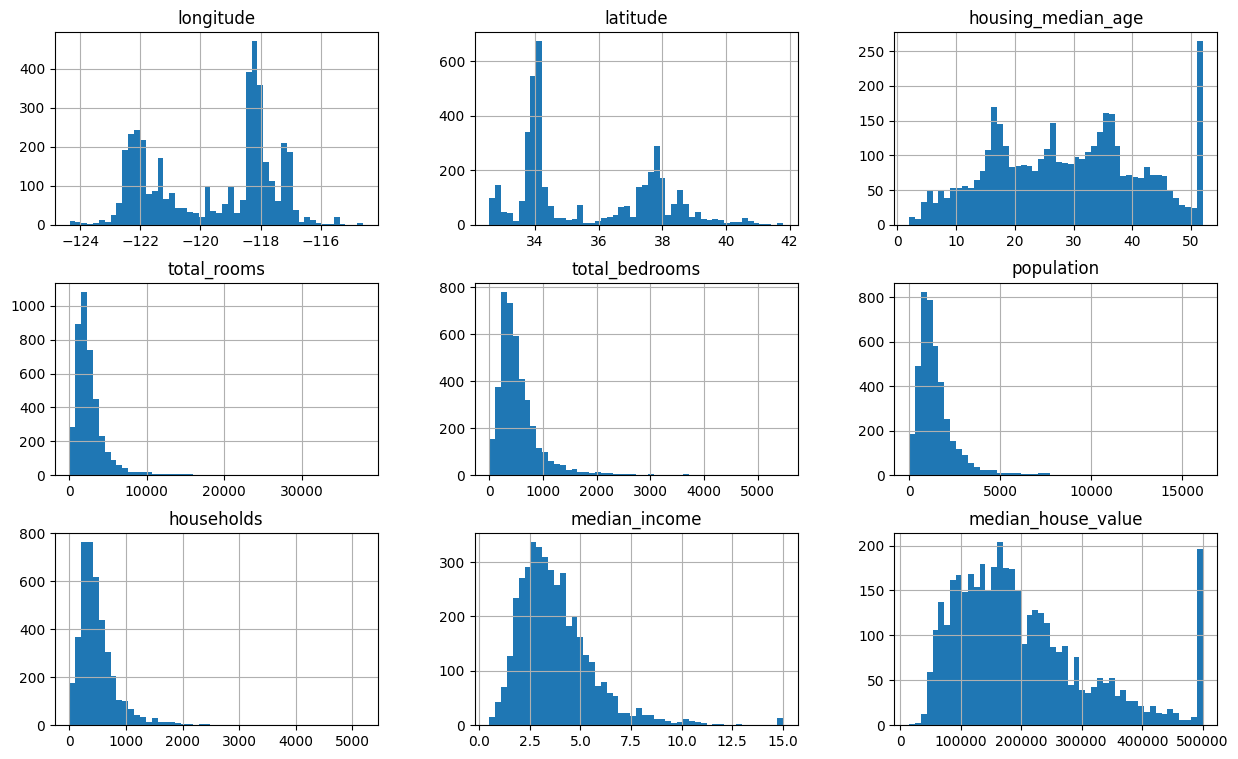

In [92]:
test_set.hist(bins=50,figsize= (15,9))

In [93]:
from zlib import crc32
def is_id_in_test_set(identifier, test_ratio):
 return crc32(np.int64(identifier)) < test_ratio * 2**32
def split_data_with_id_hash(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]
housing_with_id = housing_prices.reset_index() # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


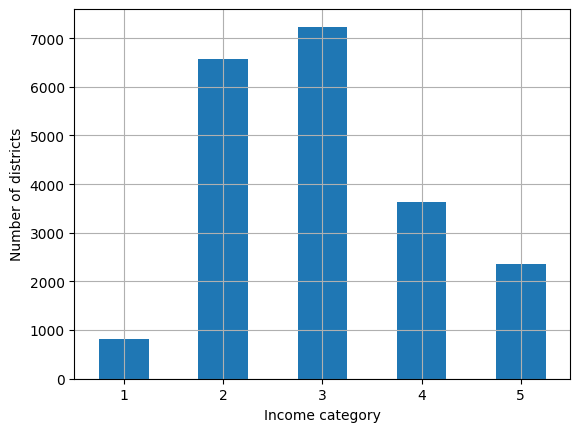

In [94]:
housing_prices["income_cat"] = pd.cut(housing_prices["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
#Gelir değerlerini 1'den 5'e kadar numaralarla isimlendirdiğimiz beş eşit aralıklı kategoriye böldük
housing_prices["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [95]:
from sklearn.model_selection import train_test_split
housing_prices = housing_prices.dropna()
strat_train_set, strat_test_set = train_test_split(housing_prices, test_size=0.2, stratify=housing_prices["income_cat"], random_state=42)
#bu fonksiyon hem kategorize etmeye hem de test setine bölmemize yarıyor, test setinin genel seti kategorilerin oranı
#açısından yansıtmak önemli
strat_test_set["income_cat"].value_counts()/len(strat_test_set) #oluşturduğumuz test setinde kategorilerin oranları

3    0.350135
2    0.318816
4    0.176658
5    0.114509
1    0.039883
Name: income_cat, dtype: float64

In [96]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)


In [97]:
#test setimizi ayırdığımıza göre datayı incelemeye geçebilriz

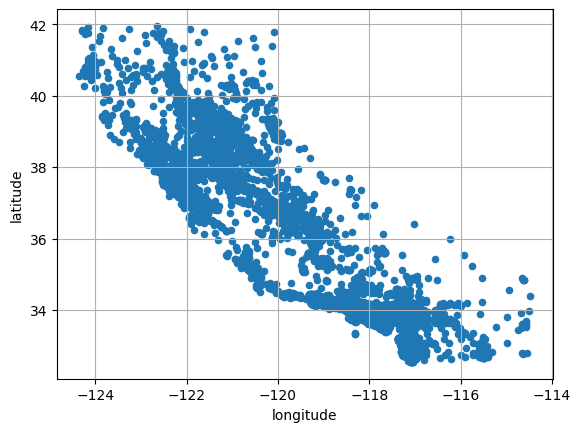

In [98]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()#evlerin konumuyla california haritası çizebilir, nerelerde emlak yoğunluğu daha fazla görebiliriz


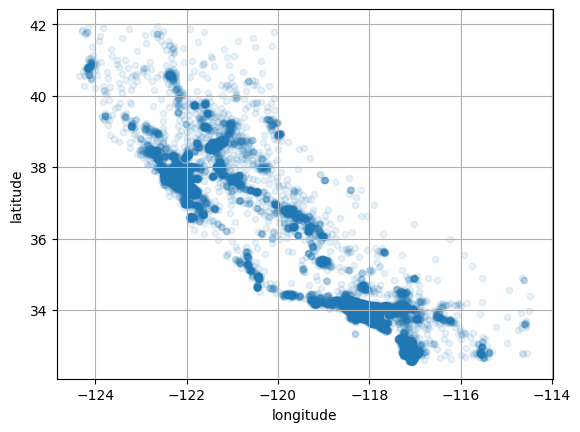

In [99]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.1)
plt.show()

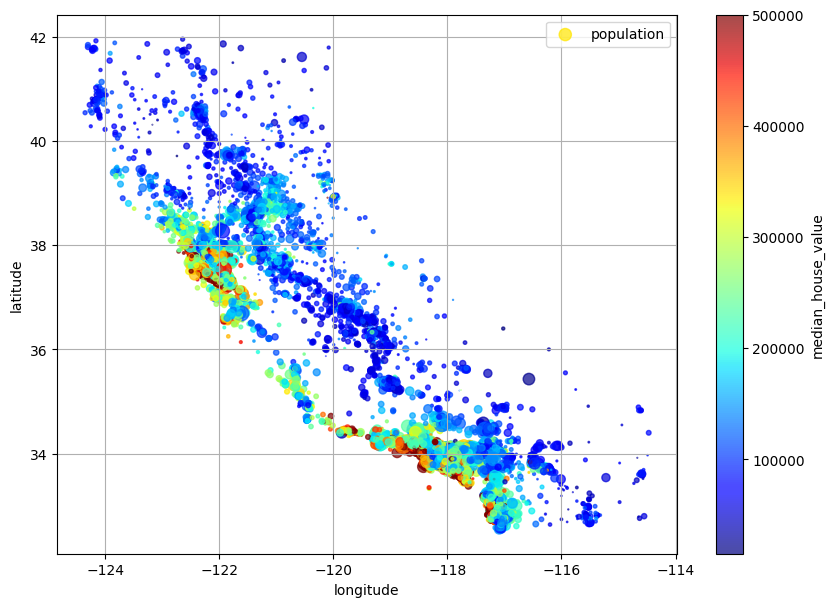

In [100]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha = 0.7,
s=housing["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [101]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)#Pearson korelasyon hesabına göre ev değeri ile diğer değişkenler arasındaki bağıntılar

C:\Users\yusuf\AppData\Local\Temp\ipykernel_20508\3156943683.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.690107
total_rooms           0.143421
housing_median_age    0.104802
households            0.075800
total_bedrooms        0.059607
population           -0.014545
longitude            -0.042341
latitude             -0.148180
Name: median_house_value, dtype: float64

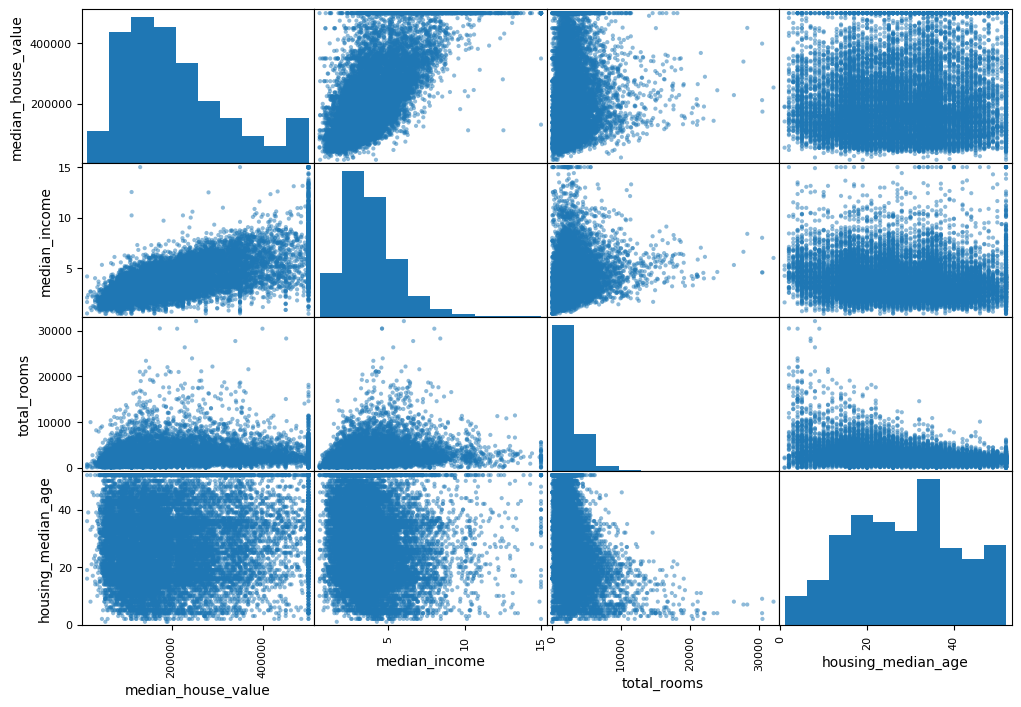

In [102]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
"housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

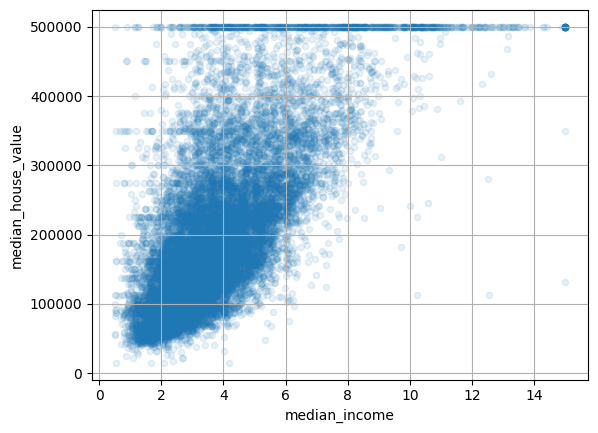

In [103]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1, grid=True)#ortalama gelir ve ev değeri arasındaki bağıntıyaa bakmak için değerleri çizersek:


In [104]:
#değerleri kullanarak bazı yenilerini üretelşm ve tekrar pearson korelasyon değerlerine bakalım
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


C:\Users\yusuf\AppData\Local\Temp\ipykernel_20508\2807494681.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.690107
rooms_per_house       0.144667
total_rooms           0.143421
housing_median_age    0.104802
households            0.075800
total_bedrooms        0.059607
population           -0.014545
people_per_house     -0.032066
longitude            -0.042341
latitude             -0.148180
bedrooms_ratio       -0.252394
Name: median_house_value, dtype: float64

In [105]:
#Şimdi datamızı uygulamaya hazırlamak için bazı fonksiyonlar yazacağız
#hedef değerleri ayırıyoruz ki onlar etkilenmesin
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [106]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [107]:
housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2127.     ,  435.     ,
       1165.     ,  409.     ,    3.54425])

In [108]:
X = imputer.transform(housing_num)
X #x is not a datafram so we must make it one


array([[-1.1882e+02,  3.4150e+01,  9.0000e+00, ...,  2.2200e+02,
         1.0900e+02,  7.8528e+00],
       [-1.2240e+02,  3.7720e+01,  4.7000e+01, ...,  9.5300e+02,
         2.5300e+02,  4.2727e+00],
       [-1.2227e+02,  3.7780e+01,  4.5000e+01, ...,  7.2300e+02,
         2.8600e+02,  3.9444e+00],
       ...,
       [-1.1825e+02,  3.3790e+01,  3.4000e+01, ...,  1.7160e+03,
         3.8000e+02,  2.7143e+00],
       [-1.2107e+02,  3.7710e+01,  3.9000e+01, ...,  9.2000e+01,
         3.7000e+01,  3.3750e+00],
       [-1.1816e+02,  3.4040e+01,  2.2000e+01, ...,  2.4860e+03,
         7.5400e+02,  1.5078e+00]])

In [109]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr.sort_index()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368
...,...,...,...,...,...,...,...,...
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [110]:
#okyanusa yakınlık gibi bir kategorik değeri değerlendirirken 0 ve 1'lerden oluşan değişkenler kullanacağız

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[4.],
       [3.],
       [3.],
       [0.],
       [4.],
       [0.],
       [0.],
       [1.]])

In [111]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [112]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [113]:
#Transformation
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)
age_simil_35

array([[4.38220836e-30],
       [5.57390369e-07],
       [4.53999298e-05],
       ...,
       [9.04837418e-01],
       [2.01896518e-01],
       [4.57533877e-08]])

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [115]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),
transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)


In [116]:
from sklearn.preprocessing import FunctionTransformer #Veri değiştiricisi oluşturma
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [117]:
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
("impute", SimpleImputer(strategy="median")),
("standardize", StandardScaler()),])
from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [118]:
from sklearn.compose import ColumnTransformer
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
"total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]
cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", cat_pipeline, cat_attribs),
])
from sklearn.compose import make_column_selector, make_column_transformer
preprocessing = make_column_transformer(
(num_pipeline, make_column_selector(dtype_include=np.number)),
(cat_pipeline, make_column_selector(dtype_include=object)),
)
housing_prepared = preprocessing.fit_transform(housing)

In [120]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
 def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
  self.n_clusters = n_clusters
  self.gamma = gamma
  self.random_state = random_state
 def fit(self, X, y=None, sample_weight=None):
  self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
  self.kmeans_.fit(X, sample_weight=sample_weight)
  return self # always return self!
 def transform(self, X):
  return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
 def get_feature_names_out(self, names=None):
  return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [121]:
def column_ratio(X):
 return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
 return ["ratio"] # feature names out
def ratio_pipeline():
 return make_pipeline(
SimpleImputer(strategy="median"),
FunctionTransformer(column_ratio, feature_names_out=ratio_name),
StandardScaler())
log_pipeline = make_pipeline(
SimpleImputer(strategy="median"),
FunctionTransformer(np.log, feature_names_out="one-to-one"),
StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
StandardScaler())
preprocessing = ColumnTransformer([
("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
("people_per_house", ratio_pipeline(), ["population", "households"]),
("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
"households", "median_income"]),
("geo", cluster_simil, ["latitude", "longitude"]),
("cat", cat_pipeline, make_column_selector(dtype_include=object)),
],
remainder=default_num_pipeline) # one column remaining: housing_median_age
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape



C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16346, 24)

In [122]:
#MODEL
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016F58EC1510>)])),
                ('linearregression', LinearRegression())])

In [124]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing)
lin_rms = mean_squared_error(housing_labels, housing_predictions)
lin_rms


4623195597.422789

In [125]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
squared=False)

tree_rmse#cevabın 0 çıkması modelin dataya çok sıkı oturmasından kaynaklanıyor


C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.0

In [127]:
#Cross validation
from sklearn.model_selection import cross_val_score
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()



C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

count       10.000000
mean     66004.007852
std       2442.093152
min      63659.909049
25%      64050.292947
50%      64912.358046
75%      67695.087179
max      70014.801691
dtype: float64

In [128]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,
RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()


C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

count       10.000000
mean     47165.970100
std       1836.919608
min      44812.397037
25%      45610.646316
50%      47114.035599
75%      48233.730230
max      50272.693925
dtype: float64

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
full_pipeline = Pipeline([
("preprocessing", preprocessing),
("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
{'preprocessing__geo__n_clusters': [5, 8, 10],
'random_forest__max_features': [4, 6, 8]},
{'preprocessing__geo__n_clusters': [10, 15],
'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(
full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)
final_model = rnd_search.best_estimator_ # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yusuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

array([0.07, 0.06, 0.04, 0.01, 0.01, 0.01, 0.01, 0.19, 0.02, 0.01, 0.01,
       0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.01,
       0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.  , 0.01, 0.01, 0.01, 0.01,
       0.01, 0.02, 0.01, 0.01, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.04, 0.  , 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [133]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")


['my_california_housing_model.pkl']